In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('_latency&transpile_time_2.csv')
data

,pkid,layers,method,backend,transpile_time,latency
0,0,7,penalty,FakeKyiv,0.250956,55608.888889
1,0,7,cyclic,FakeKyiv,0.433796,67022.222222
2,0,1,commute,FakeKyiv,0.248579,63260.444444
3,0,7,HEA,FakeKyiv,0.198828,73713.777778
4,0,7,penalty,FakeTorino,0.225499,13704.000000
5,0,7,cyclic,FakeTorino,0.295761,17132.000000
6,0,1,commute,FakeTorino,0.235461,16712.000000
7,0,7,HEA,FakeTorino,0.201879,15644.000000
8,0,7,penalty,FakeBrisbane,0.249540,59820.000000
9,0,7,cyclic,FakeBrisbane,0.315704,79200.000000


In [38]:
# data.strategy = data.strategy.apply(lambda x: '1' if x else 'qiskit')
data = data.drop(columns=['layers'])
data

,pkid,method,backend,transpile_time,latency
0,0,penalty,FakeKyiv,0.250956,55608.888889
1,0,cyclic,FakeKyiv,0.433796,67022.222222
2,0,commute,FakeKyiv,0.248579,63260.444444
3,0,HEA,FakeKyiv,0.198828,73713.777778
4,0,penalty,FakeTorino,0.225499,13704.000000
5,0,cyclic,FakeTorino,0.295761,17132.000000
6,0,commute,FakeTorino,0.235461,16712.000000
7,0,HEA,FakeTorino,0.201879,15644.000000
8,0,penalty,FakeBrisbane,0.249540,59820.000000
9,0,cyclic,FakeBrisbane,0.315704,79200.000000


In [39]:
# 设置索引列
index_columns = ['pkid', 'method', 'backend']
value_columns = [col for col in data.columns if col not in index_columns]
data['backend'] = data['backend'].str.replace('^ibm_', '', regex=True)
data

,pkid,method,backend,transpile_time,latency
0,0,penalty,FakeKyiv,0.250956,55608.888889
1,0,cyclic,FakeKyiv,0.433796,67022.222222
2,0,commute,FakeKyiv,0.248579,63260.444444
3,0,HEA,FakeKyiv,0.198828,73713.777778
4,0,penalty,FakeTorino,0.225499,13704.000000
5,0,cyclic,FakeTorino,0.295761,17132.000000
6,0,commute,FakeTorino,0.235461,16712.000000
7,0,HEA,FakeTorino,0.201879,15644.000000
8,0,penalty,FakeBrisbane,0.249540,59820.000000
9,0,cyclic,FakeBrisbane,0.315704,79200.000000


In [40]:
# probs = ['F1','G1','K1']
# data.pkid = data.pkid.apply(lambda x: probs[x])
# data

In [41]:
data = data.groupby(['method','pkid','backend',]).mean()
data

transpile_time       latency
method  pkid backend                                   
HEA     0    FakeBrisbane        0.174298  75600.000000
             FakeKyiv            0.198828  73713.777778
             FakeTorino          0.201879  15644.000000
commute 0    FakeBrisbane        0.238957  81180.000000
             FakeKyiv            0.248579  63260.444444
             FakeTorino          0.235461  16712.000000
cyclic  0    FakeBrisbane        0.315704  79200.000000
             FakeKyiv            0.433796  67022.222222
             FakeTorino          0.295761  17132.000000
penalty 0    FakeBrisbane        0.249540  59820.000000
             FakeKyiv            0.250956  55608.888889
             FakeTorino          0.225499  13704.000000

In [42]:
data2draw = data.pivot_table(index =['backend'], columns='method', values=['latency', 'transpile_time'], sort=False)
data2draw

transpile_time                                     latency  \
method                  HEA   commute    cyclic   penalty           HEA   
backend                                                                   
FakeBrisbane       0.174298  0.238957  0.315704  0.249540  75600.000000   
FakeKyiv           0.198828  0.248579  0.433796  0.250956  73713.777778   
FakeTorino         0.201879  0.235461  0.295761  0.225499  15644.000000   

                                                        
method             commute        cyclic       penalty  
backend                                                 
FakeBrisbane  81180.000000  79200.000000  59820.000000  
FakeKyiv      63260.444444  67022.222222  55608.888889  
FakeTorino    16712.000000  17132.000000  13704.000000

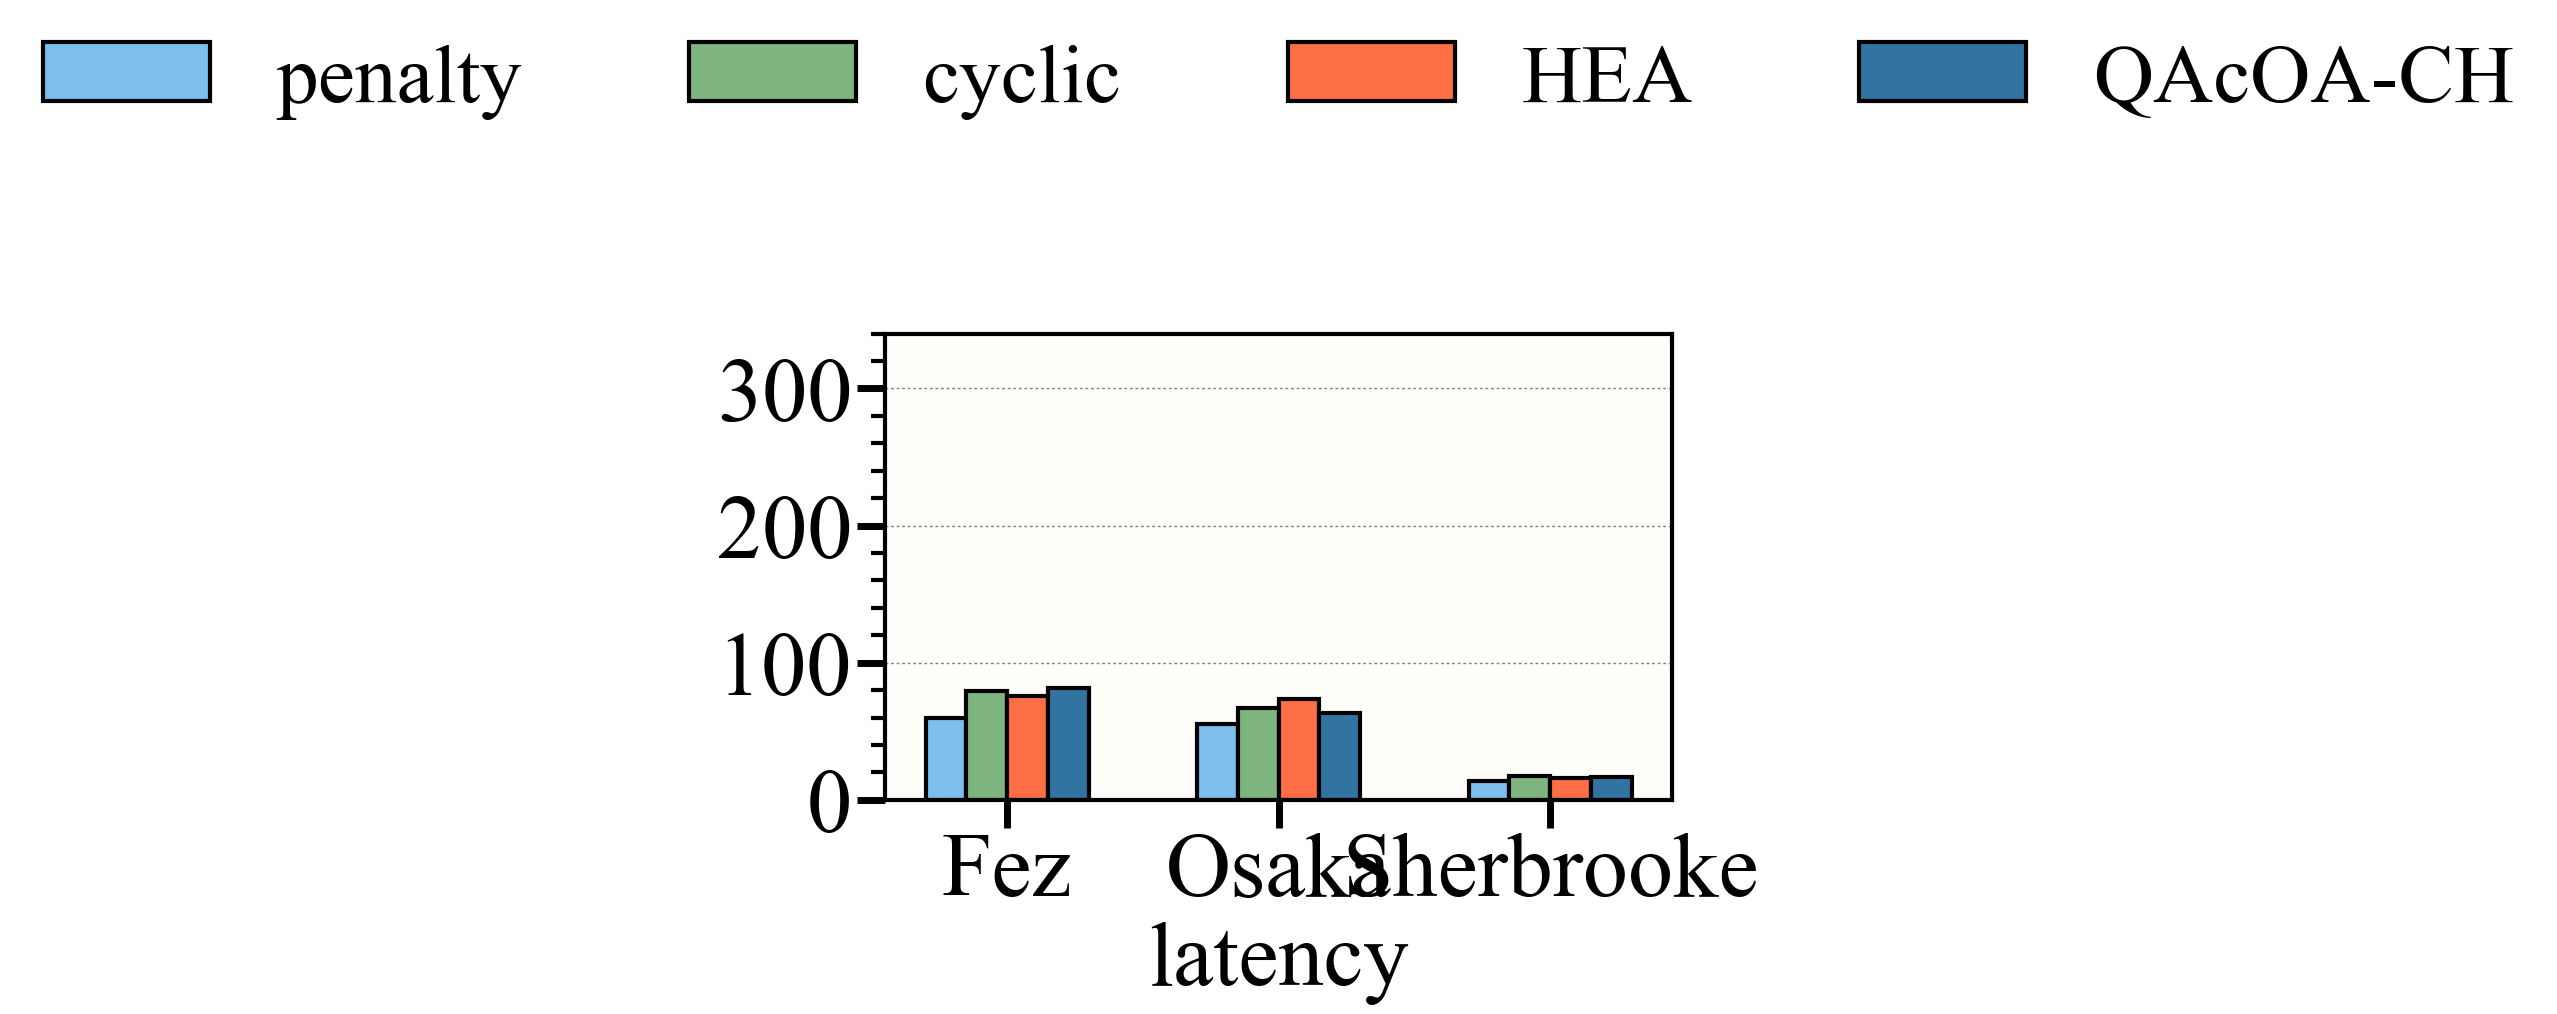

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1.05
fig = plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 3,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 2,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

bar_width = 0.12
shrink = 0.2
colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
indexs = [i for i in np.arange(0, len(data2draw.index.values))]
for i in range(0, len(indexs) - 1, 3):
    indexs[i] += shrink
    indexs[i + 2] -= shrink
metric = 'latency'
axes = plt.axes([0, 0, 0.30, 0.37])
ylabel = "latency"
ymetric = metric

axes.bar([index - 1.5 * bar_width for index in indexs], data2draw[ymetric]['penalty'] / 1000, width=bar_width, label="penalty", color=colors[0], linewidth=3, edgecolor='black')
axes.bar([index - 0.5 * bar_width for index in indexs], data2draw[ymetric]['cyclic'] / 1000, width=bar_width, label="cyclic", color=colors[1], linewidth=3, edgecolor='black')
axes.bar([index + 0.5 * bar_width for index in indexs], data2draw[ymetric]['HEA'] / 1000, width=bar_width, label="HEA", color=colors[2], linewidth=3, edgecolor='black')
axes.bar([index + 1.5 * bar_width for index in indexs], data2draw[ymetric]['commute'] / 1000, width=bar_width, label="QAcOA-CH", color=colors[3], linewidth=3, edgecolor='black')
axes.set_xticks(indexs, minor=False)
axes.set_xticklabels(["Fez", "Osaka", "Sherbrooke"])
axes.set_xlabel("latency")
axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
axes.set_facecolor("#fffef877")
axes.set_xlim(0 - 3 * bar_width + shrink, 2 + 3 * bar_width - shrink)
axes.set_yticks(range(0, 350, 100), minor=False)
axes.set_yticks([x / 5 for x in range(0, 350 * 5, 100)], minor=True)
    # axes.set_yscale('log')
axes.legend(frameon=False, bbox_to_anchor=(0.5, 1.3), loc='lower center', ncol=4, prop={'size': 60})
# fig.legend([line_improvement, line_speedup], ['improvement', 'speedup'], frameon=False, loc='lower center', ncol=4, prop={'size': 60}, bbox_to_anchor=(0.45, 1.35))
# plt.tight_layout()
plt.savefig("latency.svg", bbox_inches="tight")
